In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv(r'C:\Users\escag\ESProjects\OnlineRetail\OnlineRetail.csv', encoding='latin1')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data Exploration and Cleaning

In [4]:
df[df.Quantity <0].sort_values(by='Quantity') # Negative values are returns

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom
...,...,...,...,...,...,...,...,...
240697,C558112,22796,PHOTO FRAME 3 CLASSIC HANGING,-1,6/26/2011 16:08,9.95,17114.0,United Kingdom
240696,C558112,23091,ZINC HERB GARDEN CONTAINER,-1,6/26/2011 16:08,6.25,17114.0,United Kingdom
240694,C558112,82486,WOOD S/3 CABINET ANT WHITE FINISH,-1,6/26/2011 16:08,8.95,17114.0,United Kingdom
242447,C558347,S,SAMPLES,-1,6/28/2011 14:47,9.90,NaN,United Kingdom


In [5]:
len(df.CustomerID.unique())

4373

In [6]:
# Check missing data
df.isnull().sum() 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df=df[~df['CustomerID'].isnull()] ## Remove Customers with No ID

In [8]:
df.isnull().sum() 

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Extract time and date

In [9]:
import datetime as dt
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [10]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
df['Sales']=df['Quantity']*df['UnitPrice'] ## Add a column with total amount spent per transaction

In [12]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [13]:
# Sales statistics
df.groupby('CustomerID')['Sales'].agg(['mean', 'median','sum', 'max', 'count' ]).sort_values(by='sum', ascending = False)

,mean,median,sum,max,count
CustomerID,,,,,
14646.0,134.047492,105.60,279489.02,4992.00,2085
18102.0,592.236697,390.00,256438.49,3828.00,433
17450.0,534.137236,240.00,187482.17,7144.72,351
14911.0,22.458516,16.80,132572.62,1687.17,5903
12415.0,159.030141,114.84,123725.45,1718.40,778
...,...,...,...,...,...
12503.0,-1126.000000,-1126.00,-1126.00,-1126.00,1
17603.0,-77.686667,12.48,-1165.30,250.00,15
14213.0,-238.440000,-237.60,-1192.20,-122.40,5


In [14]:
df.drop(['StockCode', 'Description','Country'], axis=1, inplace=True) ## Remove columns of no interest

In [15]:
df=df.drop_duplicates()  ## Remove duplicated rows

In [16]:
df_0=df.copy()
df_0

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Sales
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
5,536365,2,2010-12-01 08:26:00,7.65,17850.0,15.30
6,536365,6,2010-12-01 08:26:00,4.25,17850.0,25.50
...,...,...,...,...,...,...
541901,581587,8,2011-12-09 12:50:00,1.95,12680.0,15.60
541903,581587,4,2011-12-09 12:50:00,4.15,12680.0,16.60
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0,10.20
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0,12.60


In [17]:
## Grouped Invoices made at the same time
df=df.groupby(['CustomerID', 'InvoiceDate', 'InvoiceNo'])[['Sales']].sum().sort_values('InvoiceDate').reset_index()

In [18]:
df

,CustomerID,InvoiceDate,InvoiceNo,Sales
0,17850.0,2010-12-01 08:26:00,536365,98.44
1,17850.0,2010-12-01 08:28:00,536366,11.10
2,13047.0,2010-12-01 08:34:00,536367,216.48
3,13047.0,2010-12-01 08:34:00,536368,40.35
4,13047.0,2010-12-01 08:35:00,536369,17.85
...,...,...,...,...
22216,13777.0,2011-12-09 12:23:00,581583,124.60
22217,13777.0,2011-12-09 12:25:00,581584,140.64
22218,15804.0,2011-12-09 12:31:00,581585,250.57
22219,13113.0,2011-12-09 12:49:00,581586,339.20


### Create Monthly Total Revenues

In [19]:
print(df['InvoiceDate'].min(), " " , df['InvoiceDate'].max()) ## Only 9 days are included in the last month of the data set

2010-12-01 08:26:00   2011-12-09 12:50:00


In [20]:
df=df[ df['InvoiceDate'] < '2011-12-01'] ## remove the last 9 days

In [21]:
# Monthly SALES
df['Invoice_M']=df['InvoiceDate'].dt.to_period('m')
MonthSales=df.groupby(df['InvoiceDate'].dt.to_period('m'))[['Sales']].sum() # Total of Monthly Sales
MonthSales.rename({'Sales': 'SumMonthSale'}, axis=1, inplace=True)
MonthSales.index.rename('Invoice_M', inplace=True)
df=df.merge(MonthSales, on='Invoice_M')

C:\Users\escag\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
df.head()

,CustomerID,InvoiceDate,InvoiceNo,Sales,Invoice_M,SumMonthSale
0,17850.0,2010-12-01 08:26:00,536365,98.44,2010-12,428447.51
1,17850.0,2010-12-01 08:28:00,536366,11.10,2010-12,428447.51
2,13047.0,2010-12-01 08:34:00,536367,216.48,2010-12,428447.51
3,13047.0,2010-12-01 08:34:00,536368,40.35,2010-12,428447.51
4,13047.0,2010-12-01 08:35:00,536369,17.85,2010-12,428447.51


### Create total and average sales per Customer

In [23]:
CustomerTot=df.groupby('CustomerID')[['Sales']].sum()
CustomerTot.rename({'Sales': 'ClientCumSales'}, inplace=True, axis=1)

In [24]:
CustomerTotMonth=df.groupby(['CustomerID', 'Invoice_M'])[['Sales']].sum()
CustomerTotMonth.rename({'Sales': 'ClientMonthCumSales'}, inplace=True, axis=1)

In [25]:
CustomerAvgMonthSale=df.groupby(['CustomerID', 'Invoice_M'])[['Sales']].mean()
CustomerAvgMonthSale.rename({'Sales': 'ClientAvgMonthSale'}, inplace=True, axis=1)

In [26]:
CustomerAvgMonthSale=CustomerAvgMonthSale.reset_index()
CustomerTotMonth=CustomerTotMonth.reset_index()

In [27]:
CustomerTot=CustomerTot.reset_index()

In [28]:
CustomerTot

,CustomerID,ClientCumSales
0,12346.0,0.00
1,12347.0,2909.56
2,12348.0,1399.80
3,12349.0,1209.49
4,12350.0,174.20
...,...,...
4326,18280.0,147.90
4327,18281.0,53.79
4328,18282.0,86.01
4329,18283.0,835.66


In [29]:
df=df.merge(CustomerTotMonth,on=['CustomerID', 'Invoice_M'], how='left')

In [30]:
df=df.merge(CustomerAvgMonthSale, on=['CustomerID', 'Invoice_M'], how='left')

In [31]:
df=df.merge(CustomerTot, on=['CustomerID'], how='left')

In [32]:
df['ClientMonthSalesPC']=df['ClientMonthCumSales']/df['SumMonthSale']*100

In [33]:
df.head(10)

,CustomerID,InvoiceDate,InvoiceNo,Sales,Invoice_M,SumMonthSale,ClientMonthCumSales,ClientAvgMonthSale,ClientCumSales,ClientMonthSalesPC
0,17850.0,2010-12-01 08:26:00,536365,98.44,2010-12,428447.51,3989.73,117.3450,3908.01,0.931206
1,17850.0,2010-12-01 08:28:00,536366,11.10,2010-12,428447.51,3989.73,117.3450,3908.01,0.931206
2,13047.0,2010-12-01 08:34:00,536367,216.48,2010-12,428447.51,274.68,91.5600,2217.74,0.064111
3,13047.0,2010-12-01 08:34:00,536368,40.35,2010-12,428447.51,274.68,91.5600,2217.74,0.064111
4,13047.0,2010-12-01 08:35:00,536369,17.85,2010-12,428447.51,274.68,91.5600,2217.74,0.064111
5,12583.0,2010-12-01 08:45:00,536370,546.38,2010-12,428447.51,546.38,546.3800,5065.97,0.127526
6,13748.0,2010-12-01 09:00:00,536371,204.00,2010-12,428447.51,204.00,204.0000,902.45,0.047614
7,17850.0,2010-12-01 09:01:00,536372,11.10,2010-12,428447.51,3989.73,117.3450,3908.01,0.931206
8,17850.0,2010-12-01 09:02:00,536373,184.80,2010-12,428447.51,3989.73,117.3450,3908.01,0.931206
9,15100.0,2010-12-01 09:09:00,536374,350.40,2010-12,428447.51,492.75,123.1875,635.10,0.115008


In [34]:
top_50=df[['CustomerID', 'ClientCumSales']].drop_duplicates().sort_values('ClientCumSales', ascending=False).head(50)

In [35]:
top_50

,CustomerID,ClientCumSales
1556,14646.0,192292.61
561,17450.0,160101.83
631,18102.0,159179.17
84,14911.0,89481.31
258,14156.0,88237.44
1822,12415.0,87090.27
25,17511.0,56563.90
1450,16684.0,49304.58
320,17949.0,49278.28
225,15061.0,44768.44


<AxesSubplot:title={'center':'Top 50 Customers'}, ylabel='CustomerID'>

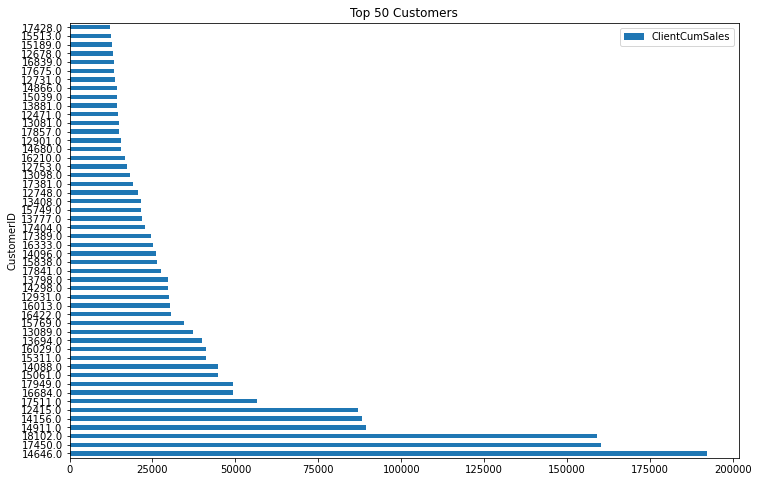

In [36]:
top_50.plot(y='ClientCumSales', x='CustomerID', kind='barh', figsize=(12,8), title='Top 50 Customers')

In [37]:
df.CustomerID.nunique() ## there are 4331 Customers in total but oly 6 (0.14%) with total sales greater than £75000

4331

### Customer's sale percentage

## Visualization

In [38]:
df.columns

Index(['CustomerID', 'InvoiceDate', 'InvoiceNo', 'Sales', 'Invoice_M',
       'SumMonthSale', 'ClientMonthCumSales', 'ClientAvgMonthSale',
       'ClientCumSales', 'ClientMonthSalesPC'],
      dtype='object')

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


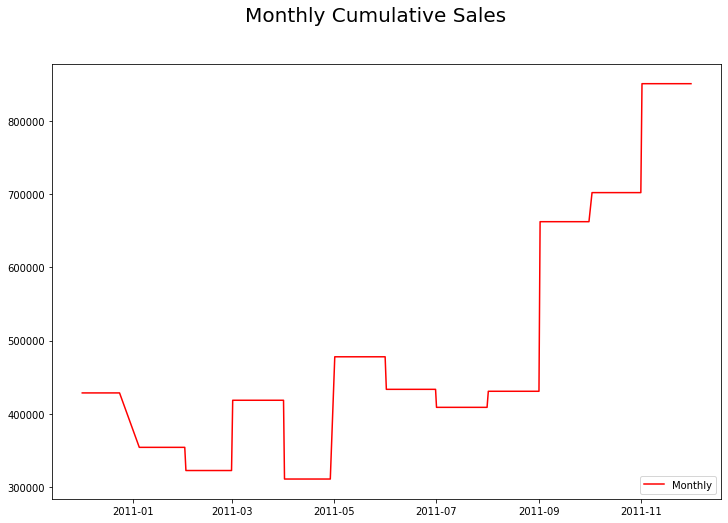

In [40]:
f, axes=plt.subplots(figsize=(12,8))

f.suptitle('Monthly Cumulative Sales', fontsize=20)
labels= ['Daily', 'Monthly', 'Quarterly']
colors=['b', 'r','g']

axes.plot(df.InvoiceDate, df.SumMonthSale, color='r', label='Monthly')
axes.legend(loc='lower right')

plt.show()

In [41]:
df.columns

Index(['CustomerID', 'InvoiceDate', 'InvoiceNo', 'Sales', 'Invoice_M',
       'SumMonthSale', 'ClientMonthCumSales', 'ClientAvgMonthSale',
       'ClientCumSales', 'ClientMonthSalesPC'],
      dtype='object')

In [42]:
cust_sales=df.groupby('CustomerID')[['Sales']].mean().reset_index()
cust_sales.rename({'Sales': 'AvgSales_per_Customer'}, axis=1, inplace=True)
cust_sales

,CustomerID,AvgSales_per_Customer
0,12346.0,0.000000
1,12347.0,484.926667
2,12348.0,349.950000
3,12349.0,1209.490000
4,12350.0,174.200000
...,...,...
4326,18280.0,147.900000
4327,18281.0,53.790000
4328,18282.0,43.005000
4329,18283.0,55.710667


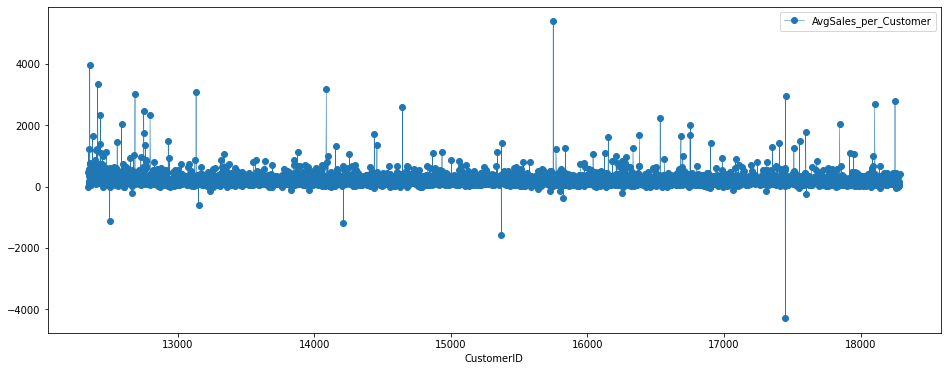

In [43]:
cust_sales.plot(kind='line', linewidth=0.5, x='CustomerID', y='AvgSales_per_Customer', figsize=(16,6), marker='o')
plt.show()

In [44]:
cust_sales.describe()

,CustomerID,AvgSales_per_Customer
count,4331.000000,4331.000000
mean,15301.893789,225.968752
std,1721.496466,261.858029
min,12346.000000,-4287.630000
25%,13815.500000,113.595000
50%,15301.000000,173.070000
75%,16780.500000,267.777778
max,18287.000000,5383.975000


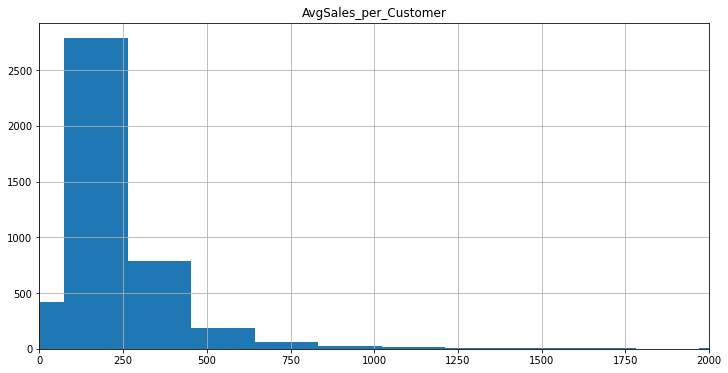

In [45]:
## Zoom into the £0-2000 interval Average Sales distribution
cust_sales.hist(column='AvgSales_per_Customer', bins=51, figsize=(12,6))
plt.xlim(0, 2000)
plt.show() 

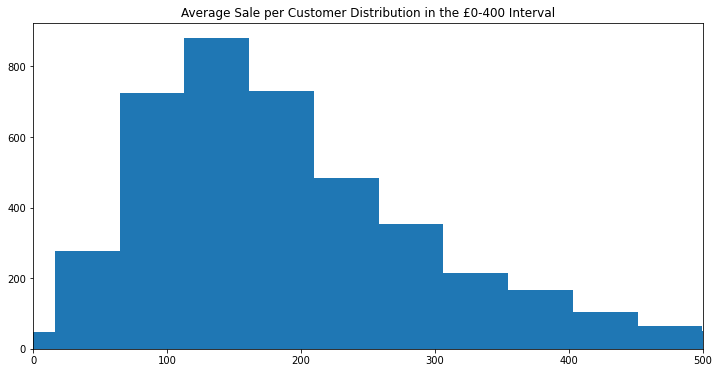

In [46]:
f, ax = plt.subplots(figsize=(12,6))
ax.hist(x=cust_sales['AvgSales_per_Customer'], bins=200, label='Avg sale per customer')
ax.set_title('Average Sale per Customer Distribution in the £0-400 Interval')
#ax.legend()
plt.xlim([0,500])
plt.show()

## Customer Segmentation 

### Calculate Recency, frequency, Monetary

#### Recency: number of days since last purchase

In [47]:
recency=df.groupby('CustomerID')[['InvoiceDate']].max()
recency.rename({'InvoiceDate': 'CustLastInvoice'}, axis=1, inplace=True)
recency

,CustLastInvoice
CustomerID,
12346.0,2011-01-18 10:17:00
12347.0,2011-10-31 12:25:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
...,...
18280.0,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00
18282.0,2011-08-09 15:10:00


In [48]:
last_invoice=df.InvoiceDate.max()
last_invoice

Timestamp('2011-11-30 17:42:00')

In [49]:
recency['Recency']= (last_invoice-recency.CustLastInvoice).dt.days

In [50]:
recency

,CustLastInvoice,Recency
CustomerID,,
12346.0,2011-01-18 10:17:00,316
12347.0,2011-10-31 12:25:00,30
12348.0,2011-09-25 13:13:00,66
12349.0,2011-11-21 09:51:00,9
12350.0,2011-02-02 16:01:00,301
...,...,...
18280.0,2011-03-07 09:52:00,268
18281.0,2011-06-12 10:53:00,171
18282.0,2011-08-09 15:10:00,113


#### Frequency: Total  customer's number of purchases

In [51]:
frequency=df.groupby('CustomerID')[['InvoiceDate']].nunique()
frequency.rename({'InvoiceDate': 'Frequency'}, axis=1, inplace=True)
frequency

,Frequency
CustomerID,
12346.0,2
12347.0,6
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,2


#### Monetary Value: Total Customer's Sale

In [52]:
df.rename({'ClientCumSales':'TotCustSale' }, axis=1, inplace=True)
df.columns

Index(['CustomerID', 'InvoiceDate', 'InvoiceNo', 'Sales', 'Invoice_M',
       'SumMonthSale', 'ClientMonthCumSales', 'ClientAvgMonthSale',
       'TotCustSale', 'ClientMonthSalesPC'],
      dtype='object')

In [53]:
monetary=df.groupby('CustomerID')[['TotCustSale']].mean()
monetary.rename({'TotCustSale': 'Monetary'}, axis=1, inplace=True)
monetary

,Monetary
CustomerID,
12346.0,0.00
12347.0,2909.56
12348.0,1399.80
12349.0,1209.49
12350.0,174.20
...,...
18280.0,147.90
18281.0,53.79
18282.0,86.01


In [54]:
recency.reset_index(inplace=True)
frequency.reset_index(inplace=True)
monetary.reset_index(inplace=True)

In [55]:
rfm=recency.copy()
rfm=rfm.merge(frequency, on='CustomerID')
rfm=rfm.merge(monetary, on='CustomerID')

In [56]:
rfm.drop('CustLastInvoice', axis=1, inplace=True)
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,316,2,0.00
1,12347.0,30,6,2909.56
2,12348.0,66,4,1399.80
3,12349.0,9,1,1209.49
4,12350.0,301,1,174.20
...,...,...,...,...
4326,18280.0,268,1,147.90
4327,18281.0,171,1,53.79
4328,18282.0,113,2,86.01
4329,18283.0,0,15,835.66


### Nomalization 

In [57]:
from sklearn.preprocessing import StandardScaler
X= rfm.values[:,1:4]
rfm_n= StandardScaler().fit_transform(X)
rfm_n

array([[ 2.27161332, -0.32188159, -0.2284646 ],
       [-0.60630273,  0.12568857,  0.26791241],
       [-0.24404757, -0.09809651,  0.01034421],
       ...,
       [ 0.22889668, -0.32188159, -0.21379111],
       [-0.90818204,  1.13272144, -0.08589926],
       [-0.5761148 , -0.20998905, -0.01934738]])

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [59]:
kmeans_per_k =[KMeans(n_clusters=k, random_state=100,max_iter=600, n_init=15).fit(rfm_n) for k in range(1,9)]
k_scores = [km.inertia_ for km in kmeans_per_k[1:]]

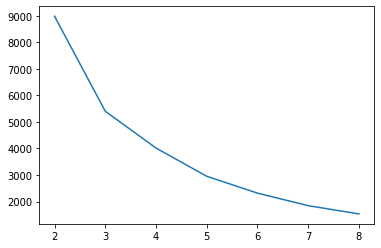

In [60]:
plt.plot(range(2,9), k_scores)

In [61]:
km=KMeans(n_clusters=5, random_state=100).fit(rfm_n)
labels = km.labels_

In [62]:
rfm['Labels']=labels

In [63]:
rfm

,CustomerID,Recency,Frequency,Monetary,Labels
0,12346.0,316,2,0.00,0
1,12347.0,30,6,2909.56,3
2,12348.0,66,4,1399.80,3
3,12349.0,9,1,1209.49,3
4,12350.0,301,1,174.20,0
...,...,...,...,...,...
4326,18280.0,268,1,147.90,0
4327,18281.0,171,1,53.79,0
4328,18282.0,113,2,86.01,3
4329,18283.0,0,15,835.66,3


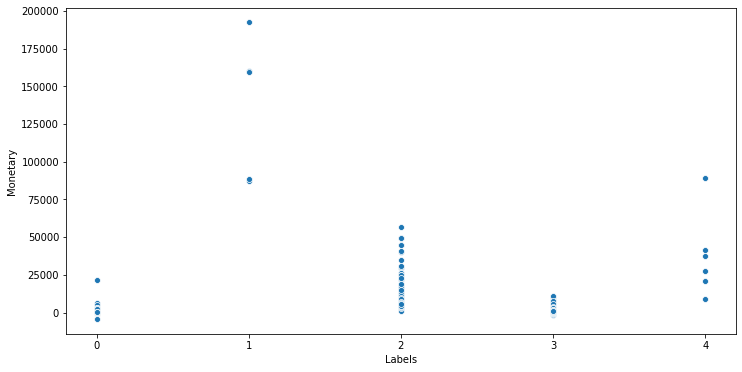

In [64]:
plt.figure(figsize=(12,6))
sns.scatterplot(y='Monetary', x='Labels', data=rfm)
plt.xticks(ticks=[0,1,2,3,4])
plt.show()

In [65]:
rfm['Groups']=rfm['Labels'].copy()

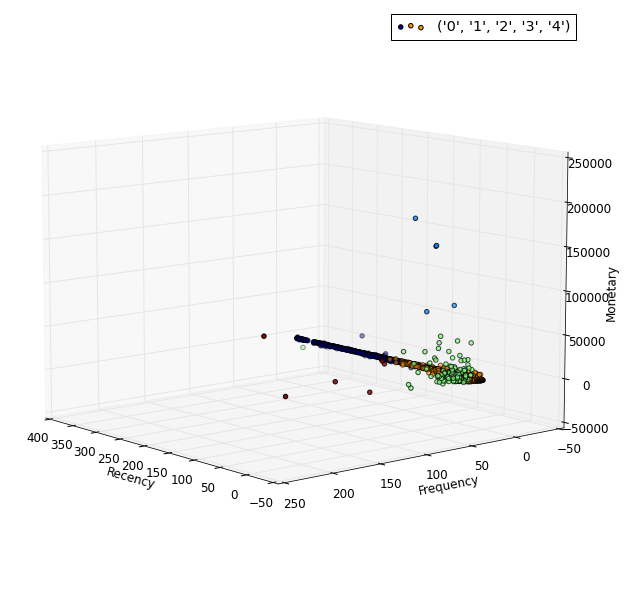

In [66]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(21,8))
plt.style.use('classic')
groups = ('0', '1', '2', '3', '4')
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim=140)

plt.cla()

ax.set_ylabel('Frequency')
ax.set_xlabel('Recency')
ax.set_zlabel('Monetary')

ax.scatter(rfm.Recency, rfm.Frequency, rfm.Monetary, c=rfm.Labels, label=groups)
ax.legend()

plt.show()


In [67]:
rfm.drop('Groups', axis=1, inplace=True)

In [68]:
rfm[rfm.Labels==0]['Labels'].count()

1110

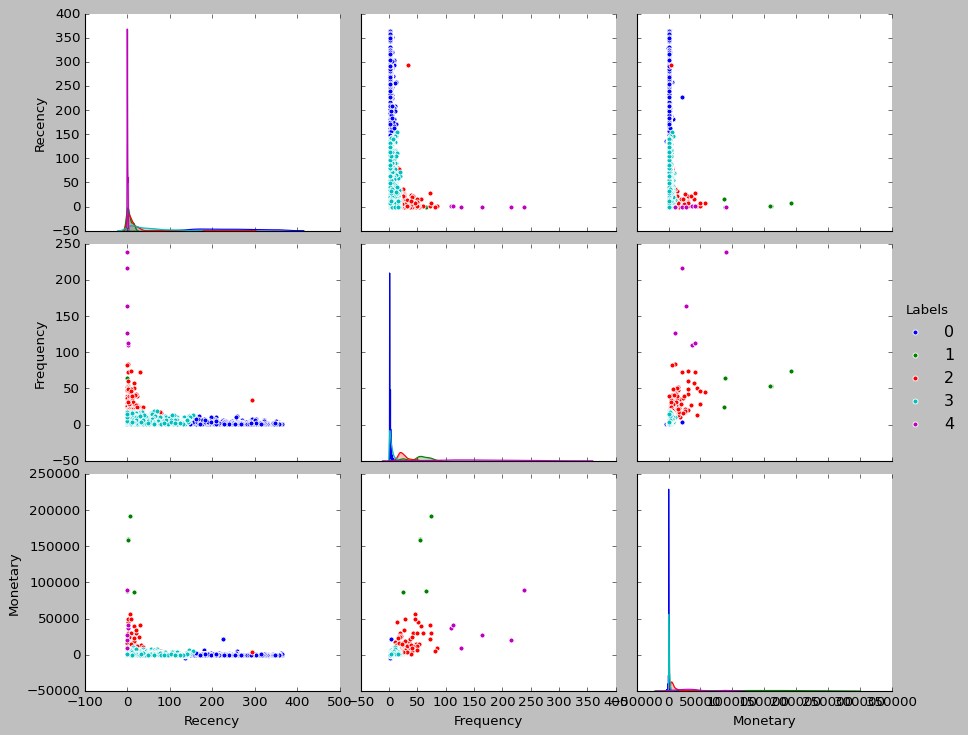

In [69]:
#import warnings
#warnings.filterwarnings("ignore")

sns.color_palette('rocket')
sns.pairplot(rfm.iloc[:,1:],hue='Labels', height=3, aspect=1.20)


### From the plots we can categorize the different Customer's Labels as follow:
    - 0 : Lost Customers. Low Value. Havent bought in a long time, dont buy frequently and dont spend much.
    - 1 : Best Customers. This represent the Top Customers, very high spenders, bought recently and buy with moderate                 frequency
    - 2 : Potential: These customer show potential. They spend slightly more than average and with moderate to high                   frequency. Should focus on this group to improve sales.
    - 3 : At Risk Customers. Similar to group 0 but have been active more recently. Low potential but have more interest in           buying than group 0.
    - 4 : Frequent buyers, dont spend as much as group 1 but they buy more frequently. 

In [70]:
groups=[0,1,2,3,4]
freq=[]
rec=[]
mon=[]
for g in groups:
    avgs=rfm.groupby('Labels').agg('mean')
    mon_med=rfm.groupby('Labels')[['Monetary']].median()
    rec.append(round(avgs.iloc[g, 1],1))
    freq.append(round(avgs.iloc[g,2],1))
    mon.append(round(mon_med.iloc[g,0], 1))
    
    

In [71]:
labels_avg=pd.DataFrame({'Labels': groups,
                       'Frequency_avg': freq,
                        'Recency_avg': rec,
                        'Monetary_median': mon})

In [72]:
cust_sales.describe()

,CustomerID,AvgSales_per_Customer
count,4331.000000,4331.000000
mean,15301.893789,225.968752
std,1721.496466,261.858029
min,12346.000000,-4287.630000
25%,13815.500000,113.595000
50%,15301.000000,173.070000
75%,16780.500000,267.777778
max,18287.000000,5383.975000


In [73]:
labels_avg

,Labels,Frequency_avg,Recency_avg,Monetary_median
0,0,1.8,240.9,209.6
1,1,54.4,5.0,159179.2
2,2,27.3,11.7,5930.8
3,3,4.3,40.0,582.5
4,4,161.3,0.5,32416.4


## New Customers per Month 

In [74]:
df

,CustomerID,InvoiceDate,InvoiceNo,Sales,Invoice_M,SumMonthSale,ClientMonthCumSales,ClientAvgMonthSale,TotCustSale,ClientMonthSalesPC
0,17850.0,2010-12-01 08:26:00,536365,98.44,2010-12,428447.51,3989.73,117.345000,3908.01,0.931206
1,17850.0,2010-12-01 08:28:00,536366,11.10,2010-12,428447.51,3989.73,117.345000,3908.01,0.931206
2,13047.0,2010-12-01 08:34:00,536367,216.48,2010-12,428447.51,274.68,91.560000,2217.74,0.064111
3,13047.0,2010-12-01 08:34:00,536368,40.35,2010-12,428447.51,274.68,91.560000,2217.74,0.064111
4,13047.0,2010-12-01 08:35:00,536369,17.85,2010-12,428447.51,274.68,91.560000,2217.74,0.064111
...,...,...,...,...,...,...,...,...,...,...
21295,14194.0,2011-11-30 17:32:00,C579883,-19.15,2011-11,850778.88,1504.00,376.000000,7257.98,0.176779
21296,14527.0,2011-11-30 17:34:00,C579884,-20.53,2011-11,850778.88,791.56,113.080000,5769.75,0.093039
21297,15444.0,2011-11-30 17:37:00,579885,596.33,2011-11,850778.88,596.33,596.330000,807.60,0.070092
21298,15676.0,2011-11-30 17:39:00,C579886,-90.42,2011-11,850778.88,1434.59,478.196667,1892.76,0.168621


In [75]:
first_invoice=df.groupby('CustomerID')[['Invoice_M']].min()
first_invoice.rename({'Invoice_M': 'CustFirstInvoice'}, axis=1, inplace=True)

In [76]:
first_invoice.reset_index(inplace=True)

In [77]:
df=df.merge(first_invoice, on='CustomerID')

In [78]:
df['New']=np.where(df.CustFirstInvoice < df.Invoice_M, '0','1') # 0:Existing Customer, 1: New Customer

In [79]:
df.New.unique()

array(['1', '0'], dtype=object)

In [80]:
CustType=df.groupby(['Invoice_M', 'New'])[['CustomerID']].nunique()

In [81]:
CustType.rename({'CustomerID': 'CountNewOld'}, axis=1, inplace=True)

In [82]:
CustType=CustType.reset_index()

In [83]:
CustType.set_index('Invoice_M',inplace=True)

In [84]:
CustType=CustType.merge(df.groupby(['Invoice_M'])[['CustomerID']].nunique(), on='Invoice_M')
CustType.rename({"CustomerID": 'TotCustomers'}, axis=1, inplace=True)

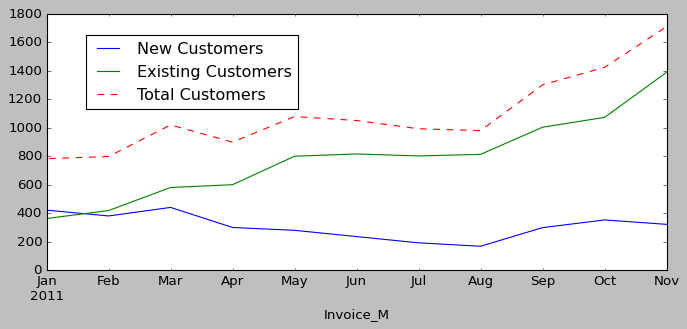

In [85]:
plt.figure(figsize=(10, 4))
CustType[CustType.New== "1"]['CountNewOld'].plot(label='New Customers')
CustType[CustType.New=="0"]['CountNewOld'].plot(label='Existing Customers')
CustType['TotCustomers'].plot(label='Total Customers',linestyle='--' )
plt.xlim('2011-01', '2011-11' )
plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95))
plt.show()

### The plot shows the rapid increase in the number of existing customer that seems to coincide with holiday periods. However, the number of New customers doesnt follow this trend and is something that needs to be looked at.

In [86]:
df['ActiveMonth'] = np.where(df['ClientMonthCumSales'] > 0, 1,0)

In [87]:
MActive=df.loc[df['ActiveMonth']== 1][['Invoice_M','CustomerID', 'ClientMonthCumSales' ]]

In [88]:
active_monthly=MActive.groupby('Invoice_M')['CustomerID'].nunique()
active_monthly.rename('ActiveCustomer_M', inplace=True)

Invoice_M
2010-12     881
2011-01     735
2011-02     753
2011-03     967
2011-04     849
2011-05    1051
2011-06     986
2011-07     942
2011-08     929
2011-09    1257
2011-10    1353
2011-11    1656
Freq: M, Name: ActiveCustomer_M, dtype: int64

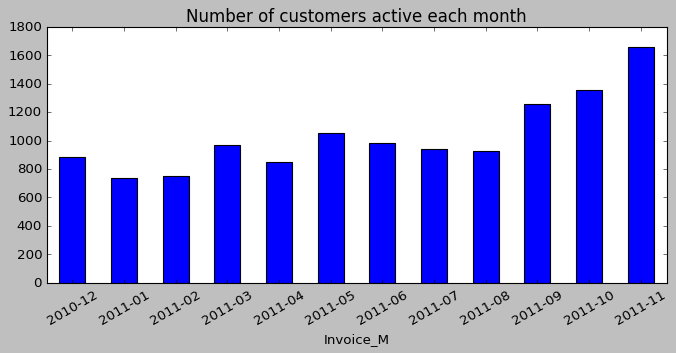

In [89]:
active_monthly.plot(x='Invoice_M',  y='ActiveCustomer_M', kind='bar', rot=30, figsize=(10,4))
plt.title('Number of customers active each month', fontsize=15);

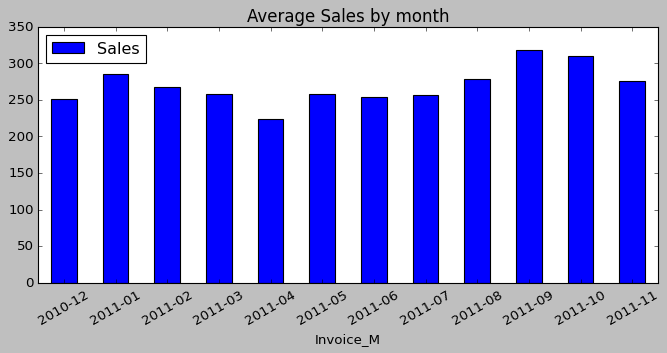

In [90]:
df.groupby('Invoice_M')[['Sales']].mean().plot(kind='bar', figsize=(10,4), rot=30)
plt.title('Average Sales by month', fontsize=15);

## Retention Rate

In [91]:
dfRet=df.groupby(['CustomerID', 'Invoice_M'])['Sales'].sum().reset_index()

In [92]:
dfRet

,CustomerID,Invoice_M,Sales
0,12346.0,2011-01,0.00
1,12347.0,2010-12,479.99
2,12347.0,2011-01,258.89
3,12347.0,2011-04,477.65
4,12347.0,2011-06,312.92
...,...,...,...
12984,18283.0,2011-09,46.62
12985,18283.0,2011-10,82.17
12986,18283.0,2011-11,253.72
12987,18287.0,2011-05,546.88


In [93]:
months=df[['Invoice_M']]

In [94]:
months=months.sort_values(by='Invoice_M').drop_duplicates()
months

,Invoice_M
0,2010-12
11575,2011-01
8345,2011-02
14665,2011-03
12249,2011-04
1222,2011-05
2853,2011-06
3040,2011-07
13852,2011-08
15178,2011-09


In [95]:
months_c=months['Invoice_M'].astype('string').tolist()
months_c

['2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11']

In [96]:
months_c[1]

'2011-01'

In [97]:
retained_customers=[]
tot_customers=[]
for i in range(len(months_c)-1):
    month=months_c[i+1]
    prev_month=months_c[i]
    clients=df[df['Invoice_M']==months_c[i+1]]['CustomerID'].unique()
    clients_prev=df[df['Invoice_M']==months_c[i]]['CustomerID'].unique()
    ret_clients=len([client for client in clients if client in clients_prev ])
    retained_customers.append(ret_clients)
    tot_customers.append(len(clients))

In [98]:
retained_customers

[362, 299, 345, 346, 399, 464, 415, 433, 465, 552, 690]

In [99]:
retained_customers

[362, 299, 345, 346, 399, 464, 415, 433, 465, 552, 690]

In [100]:
tot_customers

[783, 798, 1020, 899, 1079, 1051, 993, 980, 1302, 1425, 1711]

In [101]:
len(df[df['Invoice_M']=='2011-12']['CustomerID'].unique())

0

In [102]:
Retention=[]
for item1, item2 in zip(retained_customers, tot_customers):
    RR= (item1/item2)
    Retention.append(RR)

In [103]:
Retention=Retention[0:11]

In [104]:
Retention

[0.4623243933588761,
 0.37468671679197996,
 0.3382352941176471,
 0.38487208008898777,
 0.3697868396663577,
 0.44148430066603234,
 0.4179254783484391,
 0.4418367346938776,
 0.35714285714285715,
 0.3873684210526316,
 0.4032729398012858]

In [105]:
months_c

['2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11']

In [106]:
months_c.remove('2010-12')



In [107]:
RR=pd.DataFrame({'Invoice_M': months_c,
              'RetentionRate': Retention})

In [108]:
RR.Invoice_M.values

array(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11'],
      dtype=object)

Text(0.5, 1.0, 'Retention rate')

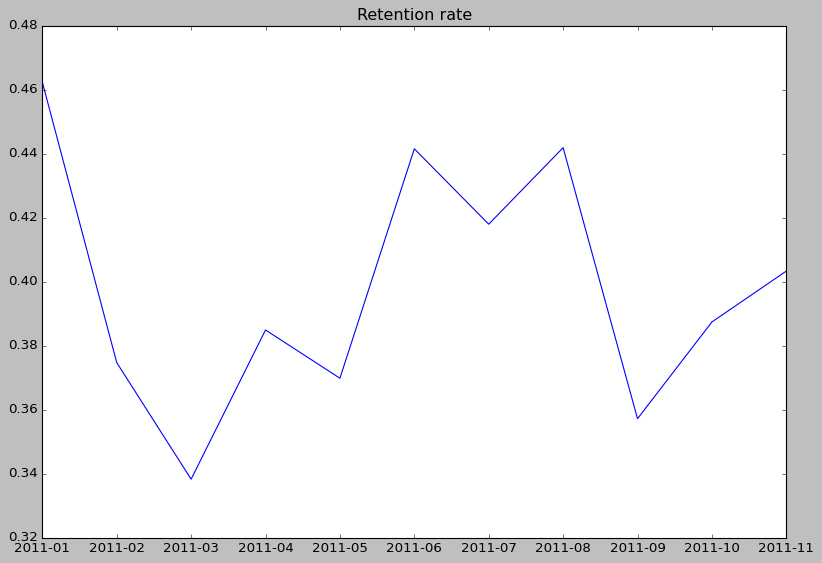

In [109]:
plt.figure(figsize=(12,8))
plt.plot(RR.Invoice_M.values, RR.RetentionRate)
plt.title('Retention rate')

In [110]:
##Retention table: which customers are active every month
crosstab=pd.crosstab(df.CustomerID, df.Invoice_M).reset_index()

In [111]:
crosstab.describe()

Invoice_M,CustomerID,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11
count,4331.000000,4331.000000,4331.00000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000
mean,15301.893789,0.394597,0.28677,0.278689,0.374740,0.320480,0.427846,0.394366,0.367813,0.356961,0.480028,0.522743,0.712999
std,1721.496466,1.230730,0.81127,0.752919,0.936654,0.827804,1.101982,0.979280,0.926524,0.939773,1.178818,1.147596,1.554570
min,12346.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13815.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15301.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16780.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,18287.000000,37.000000,13.00000,15.000000,18.000000,12.000000,25.000000,20.000000,17.000000,19.000000,39.000000,29.000000,48.000000


In [112]:
for m in crosstab.columns[1:]:
    sum_invoices= crosstab[m].sum()
    print(m, sum_invoices)

2010-12 1709
2011-01 1242
2011-02 1207
2011-03 1623
2011-04 1388
2011-05 1853
2011-06 1708
2011-07 1593
2011-08 1546
2011-09 2079
2011-10 2264
2011-11 3088


In [113]:
df[df['Invoice_M']== '2010-12'][['Invoice_M']].count()

Invoice_M    1709
dtype: int64

In [114]:
df.groupby(['CustomerID', 'Invoice_M'])[['InvoiceDate']].count()

InvoiceDate
CustomerID Invoice_M             
12346.0    2011-01              2
12347.0    2010-12              1
           2011-01              1
           2011-04              1
           2011-06              1
...                           ...
18283.0    2011-09              1
           2011-10              1
           2011-11              4
18287.0    2011-05              1
           2011-10              2

[12989 rows x 1 columns]

In [115]:
df.head()

,CustomerID,InvoiceDate,InvoiceNo,Sales,Invoice_M,SumMonthSale,ClientMonthCumSales,ClientAvgMonthSale,TotCustSale,ClientMonthSalesPC,CustFirstInvoice,New,ActiveMonth
0,17850.0,2010-12-01 08:26:00,536365,98.44,2010-12,428447.51,3989.73,117.345,3908.01,0.931206,2010-12,1,1
1,17850.0,2010-12-01 08:28:00,536366,11.10,2010-12,428447.51,3989.73,117.345,3908.01,0.931206,2010-12,1,1
2,17850.0,2010-12-01 09:01:00,536372,11.10,2010-12,428447.51,3989.73,117.345,3908.01,0.931206,2010-12,1,1
3,17850.0,2010-12-01 09:02:00,536373,184.80,2010-12,428447.51,3989.73,117.345,3908.01,0.931206,2010-12,1,1
4,17850.0,2010-12-01 09:32:00,536375,184.80,2010-12,428447.51,3989.73,117.345,3908.01,0.931206,2010-12,1,1


In [116]:
customers = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (x.max()-x.min()).days,
                                          'InvoiceNo': lambda x: len(x.unique()),
                                         'Sales': lambda x: sum(x)} )
customers.columns=['DaysActive', 'N.ofInvoices', 'TotSales']
customers.head()

,DaysActive,N.ofInvoices,TotSales
CustomerID,,,
12346.0,0,2,0.00
12347.0,327,6,2909.56
12348.0,282,4,1399.80
12349.0,0,1,1209.49
12350.0,0,1,174.20


In [117]:
customers.drop(['N.ofInvoices', 'TotSales'], axis=1, inplace=True)


In [118]:
customers.reset_index()

,CustomerID,DaysActive
0,12346.0,0
1,12347.0,327
2,12348.0,282
3,12349.0,0
4,12350.0,0
...,...,...
4326,18280.0,0
4327,18281.0,0
4328,18282.0,4
4329,18283.0,327


In [119]:
rfm2=rfm.copy()
rfm2

,CustomerID,Recency,Frequency,Monetary,Labels
0,12346.0,316,2,0.00,0
1,12347.0,30,6,2909.56,3
2,12348.0,66,4,1399.80,3
3,12349.0,9,1,1209.49,3
4,12350.0,301,1,174.20,0
...,...,...,...,...,...
4326,18280.0,268,1,147.90,0
4327,18281.0,171,1,53.79,0
4328,18282.0,113,2,86.01,3
4329,18283.0,0,15,835.66,3


In [120]:
rfm2=rfm2.merge(customers, on='CustomerID', how='left')

In [121]:
rfm2.drop('Labels', axis=1, inplace=True)

In [122]:
rfm2.values[:,1:5]

array([[3.16000e+02, 2.00000e+00, 0.00000e+00, 0.00000e+00],
       [3.00000e+01, 6.00000e+00, 2.90956e+03, 3.27000e+02],
       [6.60000e+01, 4.00000e+00, 1.39980e+03, 2.82000e+02],
       ...,
       [1.13000e+02, 2.00000e+00, 8.60100e+01, 4.00000e+00],
       [0.00000e+00, 1.50000e+01, 8.35660e+02, 3.27000e+02],
       [3.30000e+01, 3.00000e+00, 1.22576e+03, 1.58000e+02]])

In [123]:
X2= rfm2.values[:,1:5]
rfm2_n= StandardScaler().fit_transform(X2)
rfm2_n

array([[ 2.27161332, -0.32188159, -0.2284646 , -0.98644394],
       [-0.60630273,  0.12568857,  0.26791241,  1.53757314],
       [-0.24404757, -0.09809651,  0.01034421,  1.19023134],
       ...,
       [ 0.22889668, -0.32188159, -0.21379111, -0.95556911],
       [-0.90818204,  1.13272144, -0.08589926,  1.53757314],
       [-0.5761148 , -0.20998905, -0.01934738,  0.23311171]])

In [124]:
k_list= [KMeans(n_clusters=k, random_state=100, max_iter=600, n_init=15 ).fit(rfm2_n) for k in range(2,10)]
km=KMeans()
km.fit(rfm2_n)
k_scores2 = [km.inertia_ for km in k_list[1:]]

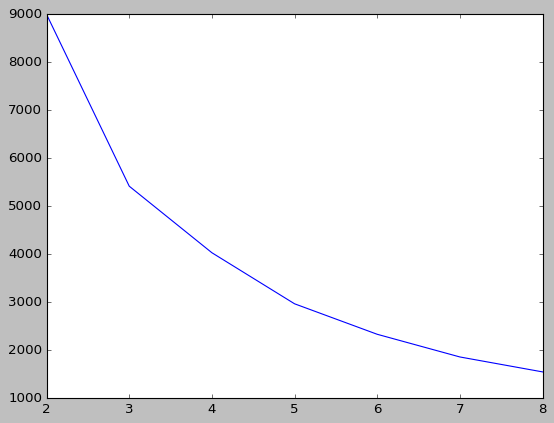

In [125]:
plt.plot(range(2,9), k_scores)

In [126]:
km=KMeans(n_clusters=5)
km.fit(rfm2_n)
rfm2_labels=km.labels_

In [127]:
rfm2_labels

array([1, 0, 0, ..., 2, 0, 2])

In [128]:
rfm2['Labels']=rfm2_labels

In [129]:
rfm2

,CustomerID,Recency,Frequency,Monetary,DaysActive,Labels
0,12346.0,316,2,0.00,0,1
1,12347.0,30,6,2909.56,327,0
2,12348.0,66,4,1399.80,282,0
3,12349.0,9,1,1209.49,0,2
4,12350.0,301,1,174.20,0,1
...,...,...,...,...,...,...
4326,18280.0,268,1,147.90,0,1
4327,18281.0,171,1,53.79,0,1
4328,18282.0,113,2,86.01,4,2
4329,18283.0,0,15,835.66,327,0


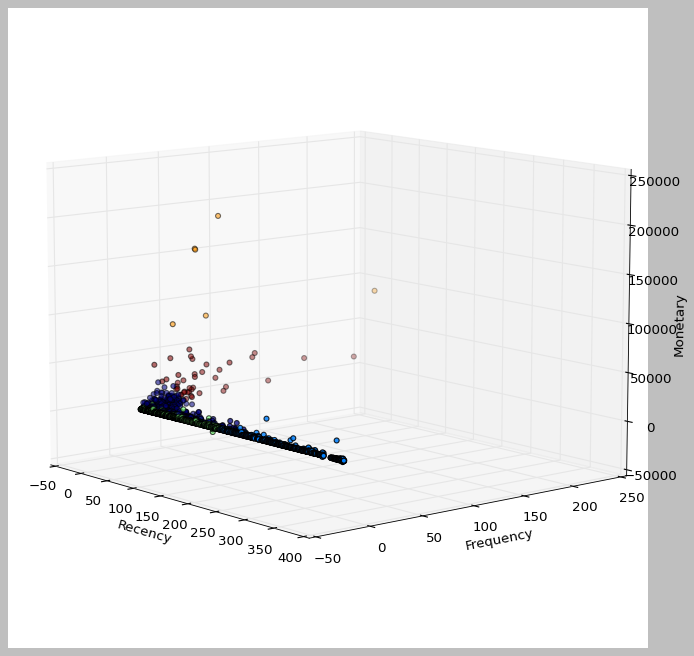

In [130]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(21,8))
plt.style.use('classic')
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=10, azim= -40)

plt.cla()

ax.set_ylabel('Frequency')
ax.set_xlabel('Recency')
ax.set_zlabel('Monetary')

ax.scatter(rfm2.Recency, rfm2.Frequency, rfm2.Monetary, c=rfm2.Labels)

In [131]:
print('Class 0:', rfm2[rfm2.Labels==0]['Labels'].count(),
      'Class 1:', rfm2[rfm2.Labels==1]['Labels'].count(),
      'Class 2:', rfm2[rfm2.Labels==2]['Labels'].count(),
      'Class 3:', rfm2[rfm2.Labels==3]['Labels'].count(),
      'Class 4:', rfm2[rfm2.Labels==4]['Labels'].count())

Class 0: 1636 Class 1: 1016 Class 2: 1633 Class 3: 6 Class 4: 40


In [132]:
print('Class 0:', rfm[rfm.Labels==0]['Labels'].count(),
      'Class 1:', rfm[rfm.Labels==1]['Labels'].count(),
      'Class 2:', rfm[rfm.Labels==2]['Labels'].count(),
      'Class 3:', rfm[rfm.Labels==3]['Labels'].count(),
      'Class 4:', rfm[rfm.Labels==4]['Labels'].count())

Class 0: 1110 Class 1: 5 Class 2: 178 Class 3: 3032 Class 4: 6


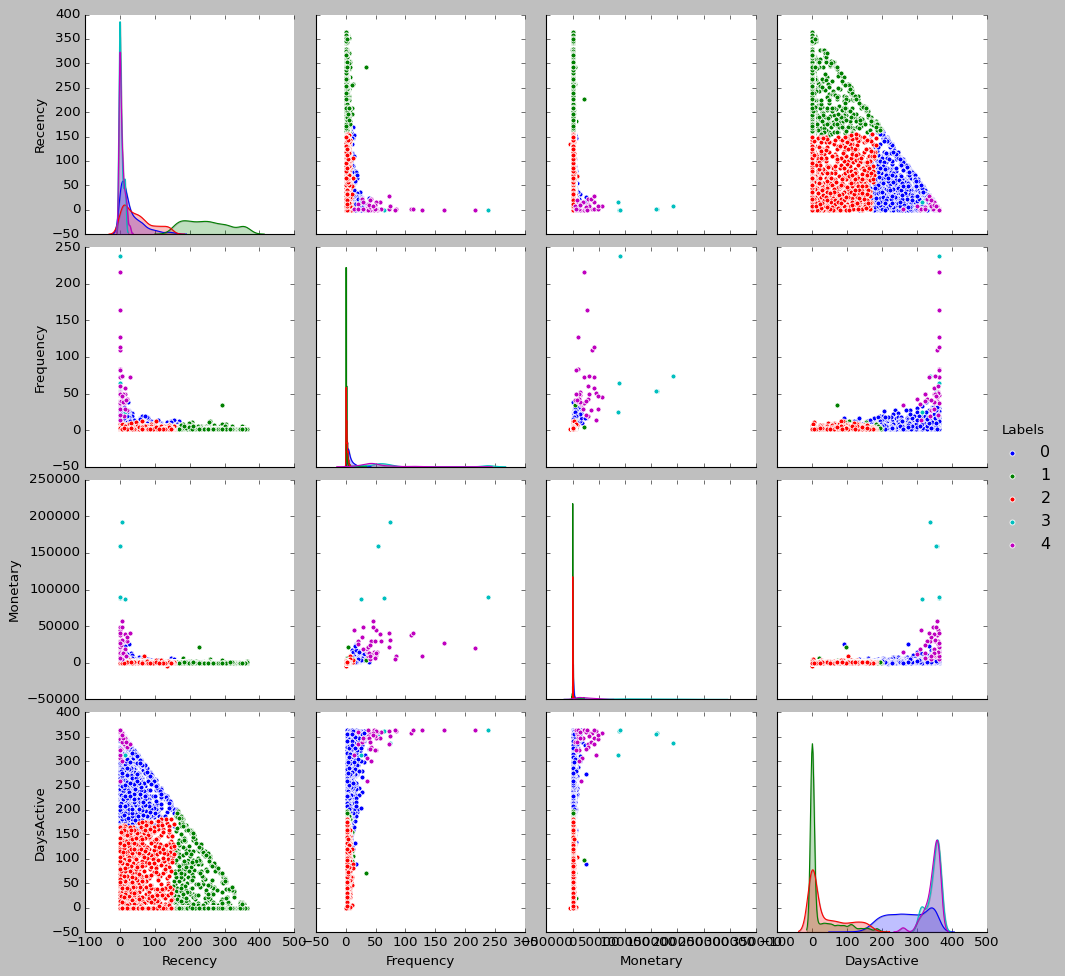

In [133]:
sns.color_palette('rocket')
sns.pairplot(rfm2.iloc[:,1:],hue='Labels', height=3)

In [134]:
rfm2[rfm2['Labels']== 2].describe()

,CustomerID,Recency,Frequency,Monetary,DaysActive,Labels
count,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.0
mean,15299.403552,51.883037,2.156767,467.544925,40.424372,2.0
std,1730.569030,42.011704,1.530704,539.963794,53.991619,0.0
min,12349.000000,0.000000,1.000000,-4287.630000,0.000000,2.0
25%,13801.000000,16.000000,1.000000,172.390000,0.000000,2.0
50%,15341.000000,42.000000,2.000000,315.700000,4.000000,2.0
75%,16801.000000,77.000000,3.000000,598.310000,76.000000,2.0
max,18287.000000,155.000000,13.000000,8678.810000,182.000000,2.0


In [135]:
rfm2[rfm2['Labels']== 4].describe()

,CustomerID,Recency,Frequency,Monetary,DaysActive,Labels
count,40.000000,40.000000,40.00000,40.000000,40.000000,40.0
mean,15104.000000,6.150000,58.27500,23739.339000,345.025000,4.0
std,1812.785051,7.388661,39.63357,14138.159735,21.788597,0.0
min,12471.000000,0.000000,14.00000,5319.740000,260.000000,4.0
25%,13334.250000,1.000000,37.75000,11476.162500,338.250000,4.0
50%,15050.000000,2.000000,47.00000,21087.745000,351.000000,4.0
75%,16722.750000,9.000000,63.25000,31547.957500,361.250000,4.0
max,17949.000000,29.000000,216.00000,56563.900000,364.000000,4.0


In [136]:
rfm2[rfm2['Labels']== 3].describe()

,CustomerID,Recency,Frequency,Monetary,DaysActive,Labels
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,15280.000000,4.166667,85.000000,129397.105000,348.166667,3.0
std,2129.896805,5.913262,76.748941,46610.842265,19.528611,0.0
min,12415.000000,0.000000,25.000000,87090.270000,313.000000,3.0
25%,14278.500000,0.250000,54.000000,88548.407500,342.250000,3.0
50%,14778.500000,1.500000,59.500000,124330.240000,356.000000,3.0
75%,16815.250000,5.750000,71.750000,159871.165000,360.750000,3.0
max,18102.000000,15.000000,238.000000,192292.610000,364.000000,3.0


In [137]:
rfm2[rfm2['Labels']== 1].describe()

,CustomerID,Recency,Frequency,Monetary,DaysActive,Labels
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.0
mean,15365.583661,249.750984,1.762795,327.552019,24.352362,1.0
std,1716.251592,62.329286,1.641168,789.821192,46.060015,0.0
min,12346.000000,150.000000,1.000000,-1192.200000,0.000000,1.0
25%,13891.500000,195.750000,1.000000,115.500000,0.000000,1.0
50%,15372.000000,245.000000,1.000000,205.245000,0.000000,1.0
75%,16797.500000,299.250000,2.000000,351.680000,27.000000,1.0
max,18281.000000,364.000000,34.000000,21535.900000,197.000000,1.0


In [138]:
rfm2[rfm2['Labels']== 0].describe()

,CustomerID,Recency,Frequency,Monetary,DaysActive,Labels
count,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.0
mean,15269.745110,31.871638,7.926039,1820.097867,273.137531,0.0
std,1712.806184,33.107397,6.003977,2200.322046,58.977267,0.0
min,12347.000000,0.000000,2.000000,-1217.740000,90.000000,0.0
25%,13822.250000,8.000000,4.000000,615.625000,223.000000,0.0
50%,15214.500000,20.000000,6.000000,1202.135000,275.000000,0.0
75%,16748.500000,47.000000,10.000000,2163.347500,329.000000,0.0
max,18283.000000,170.000000,39.000000,26021.850000,364.000000,0.0


In [139]:
import lifetimes

In [140]:
summary =lifetimes.utils.summary_data_from_transaction_data(df, 'CustomerID', 'InvoiceDate', 'Sales', observation_period_end='2011-11-30')
summary = summary.reset_index()
summary.head(20)

,CustomerID,frequency,recency,T,monetary_value
0,12346.0,0.0,0.0,316.0,0.000000
1,12347.0,5.0,328.0,358.0,485.914000
2,12348.0,3.0,283.0,349.0,259.720000
3,12349.0,0.0,0.0,9.0,0.000000
4,12350.0,0.0,0.0,301.0,0.000000
5,12352.0,6.0,260.0,287.0,174.876667
6,12353.0,0.0,0.0,195.0,0.000000
7,12354.0,0.0,0.0,223.0,0.000000
8,12355.0,0.0,0.0,205.0,0.000000
9,12356.0,2.0,303.0,316.0,231.305000


In [141]:
rfm2

,CustomerID,Recency,Frequency,Monetary,DaysActive,Labels
0,12346.0,316,2,0.00,0,1
1,12347.0,30,6,2909.56,327,0
2,12348.0,66,4,1399.80,282,0
3,12349.0,9,1,1209.49,0,2
4,12350.0,301,1,174.20,0,1
...,...,...,...,...,...,...
4326,18280.0,268,1,147.90,0,1
4327,18281.0,171,1,53.79,0,1
4328,18282.0,113,2,86.01,4,2
4329,18283.0,0,15,835.66,327,0


In [142]:
bgf= lifetimes.BetaGeoFitter(penalizer_coef=0)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

<lifetimes.BetaGeoFitter: fitted with 4331 subjects, a: 0.02, alpha: 56.77, b: 0.50, r: 0.85>

In [143]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.847379,0.026911,0.794634,0.900125
alpha,56.772298,2.171731,52.515704,61.028891
a,0.022315,0.006796,0.008994,0.035636
b,0.503210,0.185759,0.139123,0.867298


In [144]:
summary['probability_alive'] = bgf.conditional_probability_alive(summary['frequency'], summary['recency'], summary['T'])
summary.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive
0,12346.0,0.0,0.0,316.0,0.000,1.000000
1,12347.0,5.0,328.0,358.0,485.914,0.992372
2,12348.0,3.0,283.0,349.0,259.720,0.982658
3,12349.0,0.0,0.0,9.0,0.000,1.000000
4,12350.0,0.0,0.0,301.0,0.000,1.000000


<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

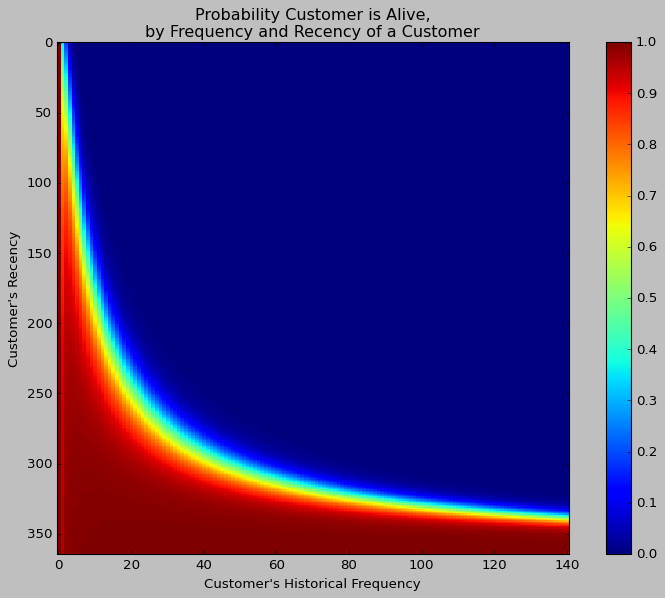

In [145]:
from lifetimes.plotting import plot_probability_alive_matrix

fig=plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [146]:
summary_pos=summary[summary['monetary_value'] >0]
summary_pos.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive
1,12347.0,5.0,328.0,358.0,485.914000,0.992372
2,12348.0,3.0,283.0,349.0,259.720000,0.982658
5,12352.0,6.0,260.0,287.0,174.876667,0.992951
9,12356.0,2.0,303.0,316.0,231.305000,0.983842
12,12359.0,4.0,274.0,322.0,859.325000,0.987864


In [147]:
t = 30
summary_pos['pred_Npurch'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, summary_pos['frequency'],
                                                                                            summary_pos['recency'], summary_pos['T']), 3)

In [148]:
summary_pos.sort_values(by='pred_Npurch', ascending=False).head(10)

,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_Npurch
1876,14911.0,140.0,364.0,364.0,635.764500,0.999840,10.033
323,12748.0,108.0,363.0,364.0,192.209630,0.999731,7.752
4006,17841.0,108.0,363.0,364.0,250.473889,0.999731,7.752
2171,15311.0,87.0,363.0,364.0,469.278851,0.999682,6.256
1656,14606.0,86.0,364.0,364.0,105.956395,0.999739,6.186
560,13089.0,79.0,358.0,360.0,463.462278,0.999583,5.741
480,12971.0,69.0,362.0,363.0,142.318841,0.999615,4.986
2985,16422.0,66.0,352.0,360.0,443.886818,0.998757,4.802
1599,14527.0,61.0,364.0,364.0,95.036885,0.999631,4.404
793,13408.0,51.0,362.0,364.0,410.196471,0.999435,3.692


## Monetary Value with GammaGamma Model

In [149]:
ggf = lifetimes.GammaGammaFitter(penalizer_coef=0.001)
ggf.fit(summary_pos['frequency'], summary_pos['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 2702 subjects, p: 8.38, q: 0.93, v: 11.04>

In [150]:
ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,8.376638,0.225336,7.934979,8.818297
q,0.930601,0.023010,0.885501,0.975701
v,11.037723,0.283577,10.481913,11.593533


## Calculate the expected average sale per customer

In [151]:
summary_pos['exp_avg_sales'] = ggf.conditional_expected_average_profit(summary_pos['frequency'], summary_pos['monetary_value'])
summary_pos.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_Npurch,exp_avg_sales
1,12347.0,5.0,328.0,358.0,485.914000,0.992372,0.419,488.931689
2,12348.0,3.0,283.0,349.0,259.720000,0.982658,0.279,264.128662
5,12352.0,6.0,260.0,287.0,174.876667,0.992951,0.593,176.960636
9,12356.0,2.0,303.0,316.0,231.305000,0.983842,0.225,237.808966
12,12359.0,4.0,274.0,322.0,859.325000,0.987864,0.379,863.873695


In [152]:
summary_pos['exp_avg_sales'].mean()

254.56430618551667

In [153]:
summary_pos['monetary_value'].mean()

248.73164377160106

### Lifetime Value

In [154]:
summary_pos['pred_clv'] =  ggf.customer_lifetime_value(bgf, summary_pos['frequency'], summary_pos['recency'], summary['T'],
                                                  summary_pos['monetary_value'], time=1)

In [155]:
summary_pos.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_Npurch,exp_avg_sales,pred_clv
1,12347.0,5.0,328.0,358.0,485.914000,0.992372,0.419,488.931689,202.979424
2,12348.0,3.0,283.0,349.0,259.720000,0.982658,0.279,264.128662,73.016808
5,12352.0,6.0,260.0,287.0,174.876667,0.992951,0.593,176.960636,103.840293
9,12356.0,2.0,303.0,316.0,231.305000,0.983842,0.225,237.808966,53.012955
12,12359.0,4.0,274.0,322.0,859.325000,0.987864,0.379,863.873695,324.037816


In [156]:
summary_pos['calc_clv'] =  summary_pos['exp_avg_sales'] * summary_pos['pred_Npurch']
summary_pos.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_Npurch,exp_avg_sales,pred_clv,calc_clv
1,12347.0,5.0,328.0,358.0,485.914000,0.992372,0.419,488.931689,202.979424,204.862378
2,12348.0,3.0,283.0,349.0,259.720000,0.982658,0.279,264.128662,73.016808,73.691897
5,12352.0,6.0,260.0,287.0,174.876667,0.992951,0.593,176.960636,103.840293,104.937657
9,12356.0,2.0,303.0,316.0,231.305000,0.983842,0.225,237.808966,53.012955,53.507017
12,12359.0,4.0,274.0,322.0,859.325000,0.987864,0.379,863.873695,324.037816,327.408130


In [157]:
summary_pos['pred_clv'].describe()

count     2702.000000
mean       164.397549
std        534.978225
min          0.453742
25%         39.087432
50%         78.238545
75%        154.197474
max      14461.115838
Name: pred_clv, dtype: float64

In [158]:
labels=rfm[['CustomerID', 'Labels']]
labels

,CustomerID,Labels
0,12346.0,0
1,12347.0,3
2,12348.0,3
3,12349.0,3
4,12350.0,0
...,...,...
4326,18280.0,0
4327,18281.0,0
4328,18282.0,3
4329,18283.0,3


In [159]:
#summary_pos.drop('Labels', axis=1, inplace=True)

In [160]:
summary_pos=summary_pos.merge(labels, on ='CustomerID', how='left')

In [161]:
summary_pos[summary_pos['Labels']==0]['pred_clv'].describe() ## Group 0 Customers

count    328.000000
mean      29.256553
std       23.199843
min        0.453742
25%       14.296376
50%       22.774016
75%       36.816748
max      148.453363
Name: pred_clv, dtype: float64

In [162]:
summary_pos[summary_pos['Labels']==1]['pred_clv'].describe() ## Group 1 Customers

count        5.000000
mean      9847.988513
std       3438.602959
min       6343.926139
25%       6610.054930
50%      10210.172989
75%      11614.672671
max      14461.115838
Name: pred_clv, dtype: float64

In [163]:
summary_pos[summary_pos['Labels']==2]['pred_clv'].describe() ## Group 2 Customers

count     178.000000
mean      722.338177
std       790.588277
min        74.264882
25%       290.706145
50%       433.369632
75%       762.725212
max      5467.022492
Name: pred_clv, dtype: float64

In [164]:
summary_pos[summary_pos['Labels']==3]['pred_clv'].describe() ## Group 3 Customers

count    2185.000000
mean      110.242944
std        99.747073
min         2.586865
25%        46.771704
50%        82.512991
75%       142.932531
max      1181.921191
Name: pred_clv, dtype: float64

In [165]:
summary_pos[summary_pos['Labels']==4]['pred_clv'].describe() ## Group 4 Customers

count       6.000000
mean     2651.509421
std      1970.562411
min       649.753089
25%      1588.034107
50%      2279.369925
75%      2839.799193
max      6316.365805
Name: pred_clv, dtype: float64

In [175]:
summary_pos

,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_Npurch,exp_avg_sales,pred_clv,calc_clv,Labels
0,12347.0,5.0,328.0,358.0,485.914000,0.992372,0.419,488.931689,202.979424,204.862378,3
1,12348.0,3.0,283.0,349.0,259.720000,0.982658,0.279,264.128662,73.016808,73.691897,3
2,12352.0,6.0,260.0,287.0,174.876667,0.992951,0.593,176.960636,103.840293,104.937657,3
3,12356.0,2.0,303.0,316.0,231.305000,0.983842,0.225,237.808966,53.012955,53.507017,3
4,12359.0,4.0,274.0,322.0,859.325000,0.987864,0.379,863.873695,324.037816,327.408130,3
...,...,...,...,...,...,...,...,...,...,...,...
2697,18272.0,5.0,201.0,237.0,284.018000,0.989469,0.590,286.700598,167.491171,169.153353,3
2698,18273.0,1.0,162.0,248.0,102.000000,0.924373,0.168,113.982046,18.932838,19.148984,3
2699,18277.0,1.0,260.0,309.0,92.530000,0.945322,0.143,104.432933,14.785975,14.933909,3
2700,18283.0,12.0,328.0,328.0,66.425833,0.998064,0.999,67.392171,66.645719,67.324779,3


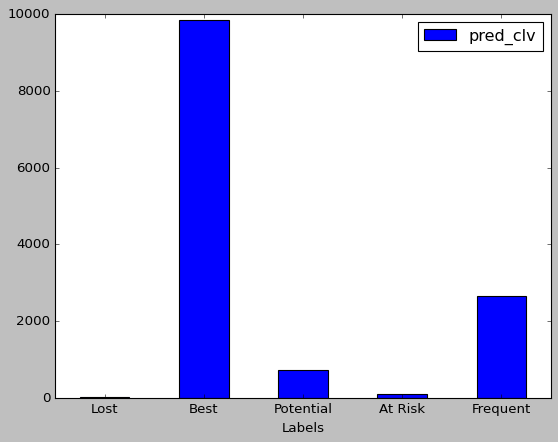

In [193]:
#f, ax=plt.subplots(figsize=(12,6))
summary_pos.groupby('Labels')[['pred_clv']].mean().plot(kind='bar')
labels=['Lost', 'Best', 'Potential', 'At Risk', 'Frequent']
plt.xticks([0,1,2,3,4], labels, rotation=0)
plt.show()

In [166]:
df.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

In [167]:
df.InvoiceDate.max()

Timestamp('2011-11-30 17:42:00')

In [168]:
summary_pos.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_Npurch,exp_avg_sales,pred_clv,calc_clv,Labels
0,12347.0,5.0,328.0,358.0,485.914000,0.992372,0.419,488.931689,202.979424,204.862378,3
1,12348.0,3.0,283.0,349.0,259.720000,0.982658,0.279,264.128662,73.016808,73.691897,3
2,12352.0,6.0,260.0,287.0,174.876667,0.992951,0.593,176.960636,103.840293,104.937657,3
3,12356.0,2.0,303.0,316.0,231.305000,0.983842,0.225,237.808966,53.012955,53.507017,3
4,12359.0,4.0,274.0,322.0,859.325000,0.987864,0.379,863.873695,324.037816,327.408130,3


In [169]:
from  lifetimes.utils import calibration_and_holdout_data



In [170]:
summary_pos_holdout = calibration_and_holdout_data(df, 'CustomerID', 'InvoiceDate', calibration_period_end ='2011-06-30',
                                                   observation_period_end='2011-11-30')

In [171]:
summary_pos_holdout.head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
CustomerID,,,,,
12346.0,0.0,0.0,163.0,0.0,153.0
12347.0,3.0,184.0,205.0,2.0,153.0
12348.0,2.0,110.0,196.0,1.0,153.0
12350.0,0.0,0.0,148.0,0.0,153.0
12352.0,3.0,34.0,134.0,3.0,153.0


In [172]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

C:\Users\escag\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


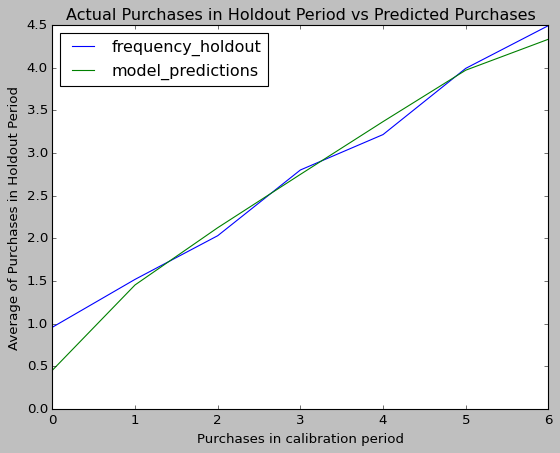

In [173]:
bgf.fit(summary_pos_holdout['frequency_cal'], summary_pos_holdout['recency_cal'],summary_pos_holdout['T_cal'] )
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_pos_holdout)
plt.legend(loc='upper left')

## **References**
### https://towardsdatascience.com/data-driven-growth-with-python-part-2-customer-segmentation-5c019d150444

### https://www.datacamp.com/community/tutorials/introduction-customer-segmentation-python

### https://medium.com/analytics-vidhya/customer-segmentation-with-rfm-analysis-kmeans-clustering-32c387d04dfe

### https://www.analyticsvidhya.com/blog/2020/10/a-definitive-guide-for-predicting-customer-lifetime-value-clv/

### https://lifetimes.readthedocs.io/en/latest/Quickstart.html

### https://medium.com/@josh.temple/how-to-estimate-the-value-of-your-customers-the-right-way-57c63fad093